"Face parameters predictor"

Dependencies:

In [16]:
import numpy

import load_dataset

Dataset processing. 
Decompress you dataset into assignment_dataset directory previously

In [17]:
# same for load in train and test notebooks
path = "assignment_dataset/train"
data_frame = load_dataset.load_dataset(path)

In [18]:
# split dataframe onto train and test datasets
train=data_frame.sample(frac=0.9)
test=data_frame.drop(train.index)

# Convert into numpy arrays (for keras)
(x_train, y_train) = numpy.asarray(train["x"].values.tolist()), numpy.asarray(train["y"].values.tolist()) 
(x_test, y_test) = numpy.asarray(test["x"].values.tolist()), numpy.asarray(test["y"].values.tolist())

# Data standardization

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std


In [19]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
# model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
# model.add(Dense(2048, activation='relu'))
model.add(Dense(50, activation='linear'))
model.summary()

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['mae'])

# save model history for plots
history = model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=2)
print(history.history.keys())
# Save the model for reusing
model.save('fpp.h5')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_20 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_22 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_23 (Dense)             (None, 50)                102450    
Total params: 2,908,082
Trainable params: 2,908,082
Non-trainable params: 0
____________________________________________

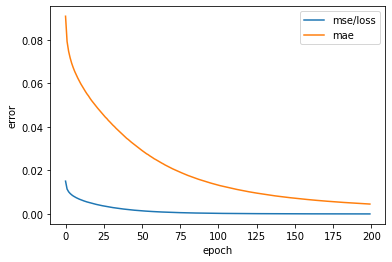

In [20]:
# plot train results
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='mse/loss')
plt.plot(history.history['mean_absolute_error'], label='mae')
#
plt.xlabel('epoch')
plt.ylabel('error')
#
plt.legend()
plt.show()
